<a href="https://colab.research.google.com/github/Lekitsherin1999/Life-Expectancy-Prediction-in-Bhutan/blob/main/Project_on_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np

RAW_CSV_URL = "https://raw.githubusercontent.com/Lekitsherin1999/Mental-Health-/main/health_indicators_btn2025.csv"

df_raw = pd.read_csv(RAW_CSV_URL)

print(df_raw.shape)
df_raw.head()

(19990, 17)


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
0,#indicator+code,#indicator+name,#indicator+url,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#dimension+type,#dimension+code,#dimension+name,#indicator+value+num,#indicator+value,#indicator+value+low,#indicator+value+high
1,PHE_HHAIR_POP_CATEGORY_FUELS,Population with primary reliance on fuels and ...,https://www.who.int/data/gho/data/indicators/i...,2012,2012,2012,SEAR,South-East Asia,BTN,Bhutan,RESIDENCEAREATYPE,RESIDENCEAREATYPE_TOTL,Total,0,0 [0 - 0.03],0,0.032994834
2,W12_imports_dutyfree_A,Health warnings on cigarette packaging law app...,https://www.who.int/data/gho/data/indicators/i...,2022,2022,2022,SEAR,South-East Asia,BTN,Bhutan,NaN,NaN,NaN,NaN,No,NaN,NaN
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2002,2002,2002,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_BTSX,Both sexes,67.84566543,67.8 [67.1-68.6],67.08312422,68.55874474
4,NCD_CHOL_MEANNONHDL_A,"Mean Non-HDL cholesterol, age-standardized",https://www.who.int/data/gho/data/indicators/i...,1991,1991,1991,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,3,3.0 [2.7-3.3],2.7,3.3


In [ ]:
df = df_raw[df_raw['GHO (CODE)'] != '#indicator+code'].copy()


df = df[df['COUNTRY (CODE)'] == 'BTN'].copy()

df_life = df[df['GHO (CODE)'] == 'WHOSIS_000001'].copy()

print(df_life['GHO (DISPLAY)'].unique())
print(df_life['DIMENSION (NAME)'].unique())
df_life.head()

['Life expectancy at birth (years)']
['Both sexes' 'Female' 'Male']


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2002,2002,2002,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_BTSX,Both sexes,67.84566543,67.8 [67.1-68.6],67.08312422,68.55874474
129,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2018,2018,2018,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,74.94852418,74.9 [74.3-75.6],74.30722839,75.63214889
628,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2004,2004,2004,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,69.63696233,69.6 [69.1-70.3],69.09666521,70.3409005
637,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2006,2006,2006,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_MLE,Male,69.17739464,69.2 [68.7-69.9],68.67982739,69.88847867
1178,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2015,2015,2015,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,74.24073046,74.2 [73.7-75.0],73.7062613,74.96810485


In [ ]:
cols_to_keep = [
    'YEAR (DISPLAY)',
    'COUNTRY (DISPLAY)',
    'DIMENSION (NAME)',
    'Numeric',
    'Low',
    'High'
]

df_life = df_life[cols_to_keep].copy()


df_life = df_life.rename(columns={
    'YEAR (DISPLAY)': 'year',
    'COUNTRY (DISPLAY)': 'country',
    'DIMENSION (NAME)': 'sex',
    'Numeric': 'life_expectancy',
    'Low': 'ci_low',
    'High': 'ci_high'
})


for col in ['life_expectancy', 'ci_low', 'ci_high']:
    df_life[col] = pd.to_numeric(df_life[col], errors='coerce')


df_life['year'] = pd.to_numeric(df_life['year'], errors='coerce').astype('Int64')


df_life = df_life.dropna(subset=['life_expectancy']).copy()


df_life = df_life.sort_values(['year', 'sex']).reset_index(drop=True)

df_life.head(10)

,year,country,sex,life_expectancy,ci_low,ci_high
0,2000,Bhutan,Both sexes,65.989561,65.331720,66.840308
1,2000,Bhutan,Female,66.272210,65.492444,67.087420
2,2000,Bhutan,Male,65.733433,65.095977,66.570549
3,2001,Bhutan,Both sexes,67.180309,66.594776,67.916677
4,2001,Bhutan,Female,67.663072,66.964688,68.370021
5,2001,Bhutan,Male,66.748684,66.017784,67.597398
6,2002,Bhutan,Both sexes,67.845665,67.083124,68.558745
7,2002,Bhutan,Female,68.427289,67.664294,69.070898
8,2002,Bhutan,Male,67.326824,66.584363,68.071776
9,2003,Bhutan,Both sexes,68.384536,67.766933,69.153985


In [ ]:
print("Shape:", df_life.shape)
print(df_life['sex'].value_counts())
print(df_life['year'].min(), "→", df_life['year'].max())

df_life.describe()

Shape: (66, 6)
sex
Both sexes    22
Female        22
Male          22
Name: count, dtype: int64
2000 → 2021


,year,life_expectancy,ci_low,ci_high
count,66.0,66.000000,66.000000,66.000000
mean,2010.5,71.363622,70.742094,72.062175
std,6.392905,2.606439,2.624229,2.579809
min,2000.0,65.733433,65.095977,66.570549
25%,2005.0,69.435956,68.838191,70.116164
50%,2010.5,71.814607,71.217063,72.552234
75%,2016.0,73.281179,72.690825,73.954405
max,2021.0,75.939756,75.477979,76.664141


In [ ]:
df_life.to_csv("life_expectancy_btn_clean.csv", index=False)

In [ ]:
from google.colab import files
files.download("life_expectancy_btn_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2. EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paste your RAW URL here
CSV_URL = "https://raw.githubusercontent.com/Lekitsherin1999/Mental-Health-/main/Data/life_expectancy_btn_clean.csv"

df = pd.read_csv(CSV_URL)
df.head()

,year,country,sex,life_expectancy,ci_low,ci_high
0,2000,Bhutan,Both sexes,65.989561,65.331720,66.840308
1,2000,Bhutan,Female,66.272210,65.492444,67.087420
2,2000,Bhutan,Male,65.733433,65.095977,66.570549
3,2001,Bhutan,Both sexes,67.180309,66.594776,67.916677
4,2001,Bhutan,Female,67.663072,66.964688,68.370021


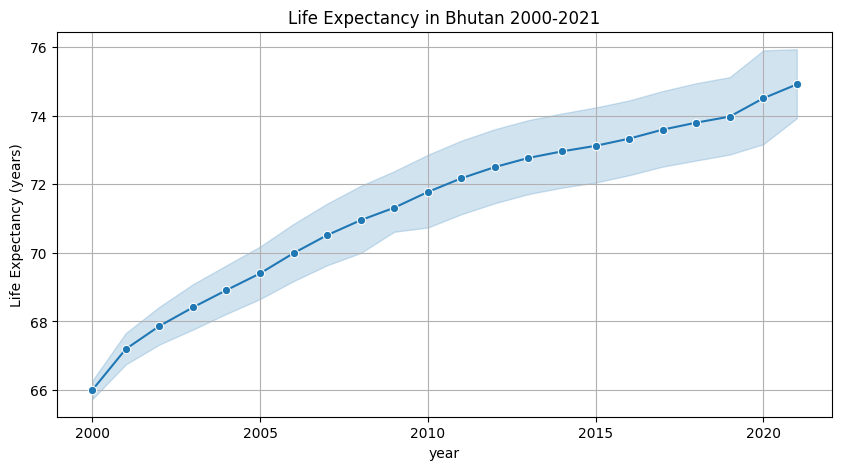

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='life_expectancy', marker='o')
plt.title("Life Expectancy in Bhutan 2000-2021")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()

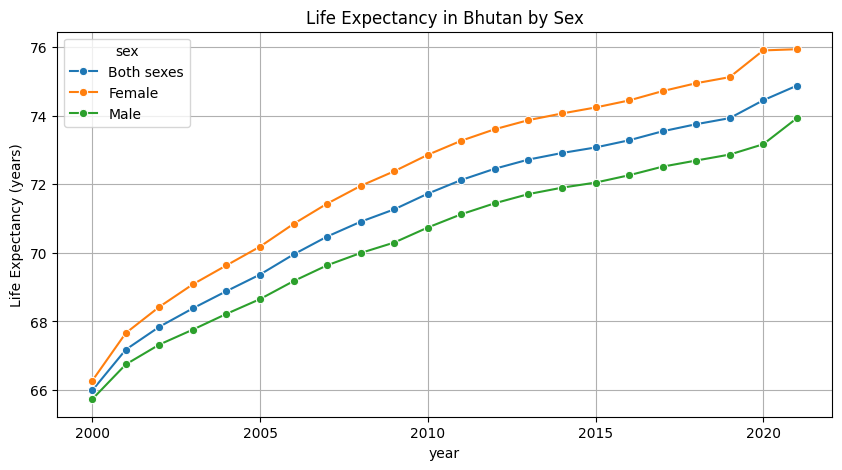

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='sex', marker='o')
plt.title("Life Expectancy in Bhutan by Sex")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()

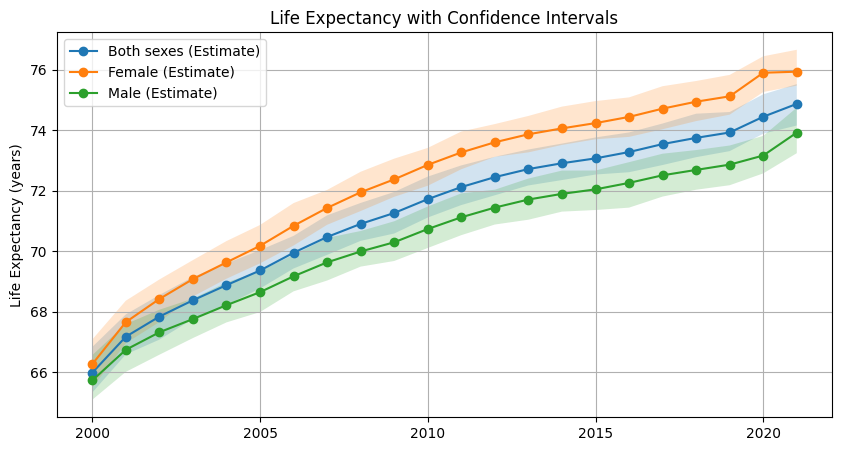

In [ ]:
plt.figure(figsize=(10,5))

for sex in df['sex'].unique():
    subset = df[df['sex'] == sex]
    plt.plot(subset['year'], subset['life_expectancy'], marker='o', label=f"{sex} (Estimate)")
    plt.fill_between(subset['year'], subset['ci_low'], subset['ci_high'], alpha=0.2)

plt.title("Life Expectancy with Confidence Intervals")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Year Range:", df['year'].min(), "→", df['year'].max())
print("\nLife Expectancy Stats:")
print(df['life_expectancy'].describe())

print("\nSex Breakdown:")
print(df['sex'].value_counts())

Year Range: 2000 → 2021

Life Expectancy Stats:
count    66.000000
mean     71.363622
std       2.606439
min      65.733433
25%      69.435956
50%      71.814607
75%      73.281179
max      75.939756
Name: life_expectancy, dtype: float64

Sex Breakdown:
sex
Both sexes    22
Female        22
Male          22
Name: count, dtype: int64


**3. Features Engineering**

In [ ]:
import pandas as pd
import numpy as np

CSV_URL = "https://raw.githubusercontent.com/Lekitsherin1999/Mental-Health-/main/Data/life_expectancy_btn_clean.csv"

df = pd.read_csv(CSV_URL)
df.head()

,year,country,sex,life_expectancy,ci_low,ci_high
0,2000,Bhutan,Both sexes,65.989561,65.331720,66.840308
1,2000,Bhutan,Female,66.272210,65.492444,67.087420
2,2000,Bhutan,Male,65.733433,65.095977,66.570549
3,2001,Bhutan,Both sexes,67.180309,66.594776,67.916677
4,2001,Bhutan,Female,67.663072,66.964688,68.370021


In [ ]:
# 1. Years since 2000 (time index)
df['years_since_2000'] = df['year'] - 2000

# 2. One-hot style flags for sex
df['is_female'] = (df['sex'] == 'Female').astype(int)
df['is_male']   = (df['sex'] == 'Male').astype(int)
# Both sexes will have 0 for both flags → baseline category

# 3. Confidence interval span
df['ci_span'] = df['ci_high'] - df['ci_low']

# 4. 3-year moving average of life expectancy within each sex
df = df.sort_values(['sex', 'year']).reset_index(drop=True)
df['life_expectancy_3yr_ma'] = (
    df.groupby('sex')['life_expectancy']
      .transform(lambda s: s.rolling(window=3, min_periods=1).mean())
)

df.head(10)

,year,country,sex,life_expectancy,ci_low,ci_high,years_since_2000,is_female,is_male,ci_span,life_expectancy_3yr_ma
0,2000,Bhutan,Both sexes,65.989561,65.331720,66.840308,0,0,0,1.508588,65.989561
1,2001,Bhutan,Both sexes,67.180309,66.594776,67.916677,1,0,0,1.321901,66.584935
2,2002,Bhutan,Both sexes,67.845665,67.083124,68.558745,2,0,0,1.475621,67.005179
3,2003,Bhutan,Both sexes,68.384536,67.766933,69.153985,3,0,0,1.387051,67.803504
4,2004,Bhutan,Both sexes,68.885143,68.229492,69.604473,4,0,0,1.374981,68.371781
5,2005,Bhutan,Both sexes,69.368954,68.771921,70.041252,5,0,0,1.269331,68.879544
6,2006,Bhutan,Both sexes,69.955630,69.435534,70.512895,6,0,0,1.077361,69.403242
7,2007,Bhutan,Both sexes,70.476308,69.885664,71.191696,7,0,0,1.306032,69.933631
8,2008,Bhutan,Both sexes,70.909038,70.348314,71.601786,8,0,0,1.253471,70.446992
9,2009,Bhutan,Both sexes,71.270071,70.590981,71.964892,9,0,0,1.373911,70.885139


In [ ]:
print("Columns after feature engineering:")
print(df.columns.tolist())

print("\nSummary of numeric columns:")
print(df.describe())

Columns after feature engineering:
['year', 'country', 'sex', 'life_expectancy', 'ci_low', 'ci_high', 'years_since_2000', 'is_female', 'is_male', 'ci_span', 'life_expectancy_3yr_ma']

Summary of numeric columns:
              year  life_expectancy     ci_low    ci_high  years_since_2000  \
count    66.000000        66.000000  66.000000  66.000000         66.000000   
mean   2010.500000        71.363622  70.742094  72.062175         10.500000   
std       6.392905         2.606439   2.624229   2.579809          6.392905   
min    2000.000000        65.733433  65.095977  66.570549          0.000000   
25%    2005.000000        69.435956  68.838191  70.116164          5.000000   
50%    2010.500000        71.814607  71.217063  72.552234         10.500000   
75%    2016.000000        73.281179  72.690825  73.954405         16.000000   
max    2021.000000        75.939756  75.477979  76.664141         21.000000   

       is_female    is_male    ci_span  life_expectancy_3yr_ma  
count  66.0

In [ ]:
output_path = "life_expectancy_btn_features.csv"
df.to_csv(output_path, index=False)
output_path


'life_expectancy_btn_features.csv'

In [ ]:
from google.colab import files
files.download("life_expectancy_btn_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**4. Modelling**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

# Paste your RAW file URL here
CSV_URL = "https://raw.githubusercontent.com/Lekitsherin1999/Mental-Health-/main/Data/life_expectancy_btn_features.csv"

df = pd.read_csv(CSV_URL)
df.head()

,year,country,sex,life_expectancy,ci_low,ci_high,years_since_2000,is_female,is_male,ci_span,life_expectancy_3yr_ma
0,2000,Bhutan,Both sexes,65.989561,65.331720,66.840308,0,0,0,1.508588,65.989561
1,2001,Bhutan,Both sexes,67.180309,66.594776,67.916677,1,0,0,1.321901,66.584935
2,2002,Bhutan,Both sexes,67.845665,67.083124,68.558745,2,0,0,1.475621,67.005179
3,2003,Bhutan,Both sexes,68.384536,67.766933,69.153985,3,0,0,1.387051,67.803504
4,2004,Bhutan,Both sexes,68.885143,68.229492,69.604473,4,0,0,1.374981,68.371781


In [ ]:
#life_expectancy
# Target
y = df['life_expectancy']

# Feature columns — all except target, country, sex (sex is already encoded)
feature_cols = [
    'year',
    'years_since_2000',
    'is_female',
    'is_male',
    'ci_low',
    'ci_high',
    'ci_span',
    'life_expectancy_3yr_ma'
]

X = df[feature_cols]

X.head()

,year,years_since_2000,is_female,is_male,ci_low,ci_high,ci_span,life_expectancy_3yr_ma
0,2000,0,0,0,65.331720,66.840308,1.508588,65.989561
1,2001,1,0,0,66.594776,67.916677,1.321901,66.584935
2,2002,2,0,0,67.083124,68.558745,1.475621,67.005179
3,2003,3,0,0,67.766933,69.153985,1.387051,67.803504
4,2004,4,0,0,68.229492,69.604473,1.374981,68.371781


In [ ]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((52, 8), (14, 8))

In [ ]:
#Train Regression Model
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
# Predict
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

#comparison
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results

RMSE: 0.12647108270692478
R²: 0.9974906152576739


,Actual,Predicted
0,70.739731,70.903863
1,72.693670,72.771425
2,65.989561,66.252911
3,66.748684,66.829945
4,69.368954,69.320938
5,72.868018,72.876511
6,73.284246,73.239590
7,72.455353,72.430651
8,73.927206,73.945034
9,71.954482,71.821955


In [ ]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>